#นาย ปพนธ์ ชุณหคล้าย 6210503691

# Download data

Source https://www.kaggle.com/code/josephcheng123456/olympic-historal-dataset-basic-analysis/data


In [ ]:
!wget https://www.cpe.ku.ac.th/~cnc/olympic_data.tar.gz -O  olympic_data.tar.gz

--2022-08-19 00:08:50--  https://www.cpe.ku.ac.th/~cnc/olympic_data.tar.gz
Resolving www.cpe.ku.ac.th (www.cpe.ku.ac.th)... 158.108.32.150
Connecting to www.cpe.ku.ac.th (www.cpe.ku.ac.th)|158.108.32.150|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23550886 (22M) [application/octet-stream]
Saving to: ‘olympic_data.tar.gz’

olympic_data.tar.gz 100%[===================>]  22.46M   100MB/s    in 0.2s    

2022-08-19 00:08:51 (100 MB/s) - ‘olympic_data.tar.gz’ saved [23550886/23550886]



In [ ]:

!tar xvf   olympic_data.tar.gz 

olympic_data/Olympic_Athlete_Bio.csv
olympic_data/Olympic_Athlete_Event_Results.csv
olympic_data/Olympic_Games_Medal_Tally.csv
olympic_data/Olympic_Results.csv


# Pyhive

Prequisite setup:  https://sites.google.com/a/ku.th/big-data/pyhive


Before running:

make sure you run:

bin/hive --service metastore &

bin/hiveserver2 &


In [ ]:
from pyhive import hive

host_name = "localhost"
port = 10000  #default is 10000
user = "root" # user name mysql 
password = "password" # pass mysql
database="default"

def hiveconnection(host_name, port, user,password, database):
    conn = hive.Connection(host=host_name, port=port, username=user,password=password,
                           database=database, auth='CUSTOM')
    cur = conn.cursor()
    cur.execute('select name  from demo2 return limit 2')
    result = cur.fetchall()

    return result



In [ ]:
# Call above function
output = hiveconnection(host_name, port, user,password, database)
print(output) 

[('chantana',), ('ploy',)]


In [ ]:
# copy to olympic_data to hdfs at /olympic_data

!hdfs dfs ...<FIXME> .....

/bin/bash: FIXME: No such file or directory


In [ ]:
myconn = hive.Connection(host=host_name, port=port, username=user,password=password,
                           database=database, auth='CUSTOM')

In [ ]:
def hive_query(cmd_query):
   
    cur = myconn.cursor()
    cur.execute(cmd_query)
    result = cur.fetchall()

    return result

From terminal hive:
create hive command line to create tables from two csv as follows.





from : Olympic_Games_Medal_Tally.csv                                 
               
* ,edition,edition_id,year,country,country_noc,gold,silver,bronze,total

 
CREATE TABLE  MedalTally(num integer,edition string,country_noc string,sport string,event string,result_id string,athlete string,athlete_id string,pos string,medal string,isTeamSport STRING )

from :  Olympic_Athlete_Event_Results.csv

,edition,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport

CREATE TABLE  Athelete(... STRING, ... STRING, ...);

* ,edition,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport


In [ ]:
# hdfs command to copy both csv to hdfs targeted at /olympic_data

!hdfs dfs -copyFromLocal /home/hadoop/hive/olympic_data/Olympic_Athlete_Event_Results.csv /Olympic_Athlete_Event_Results.csv
!hdfs dfs -copyFromLocal /home/hadoop/hive/olympic_data/Olympic_Games_Medal_Tally.csv /Olympic_Games_Medal_Tally.csv



2022-08-19 09:52:23,545 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
2022-08-19 09:52:24,479 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false
2022-08-19 09:52:25,883 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
copyFromLocal: `/Olympic_Games_Medal_Tally.csv': File exists


In [ ]:
# code to upload both data to  your table

# cmd1 = "CREATE TABLE athelete (id string, edition string,country_noc string,sport string,event string,result_id string,athlete string,athlete_id string,pos string,medal string,isTeamSport String)
#         ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.OpenCSVSerde'
#         STORED AS TEXTFILE;"

# cmd2 = "load data inpath 'hdfs://localhost:9000/Olympic_Athlete_Event_Results.csv' into table athelete"

# ใช้คำสั่ง cmd1 และ cmd2 ใน hive โดยตรง

# cmd3 = "create table MedalTally (id string, edition string,edition_id string,year integer,country string,country_noc string,gold integer,silver integer,bronze integer,total integer)
#         ROW FORMAT DELIMITED
#         FIELDS TERMINATED BY ","
#         STORED AS TEXTFILE;"

# cmd4 = "load data inpath 'hdfs://localhost:9000/Olympic_Games_Medal_Tally.csv' into table MedalTally"

# ใช้คำสั่ง cmd3 และ cmd4 ใน hive โดยตรง

# hive_query()


Create Table

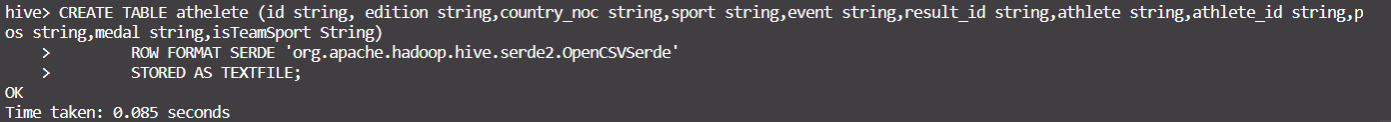

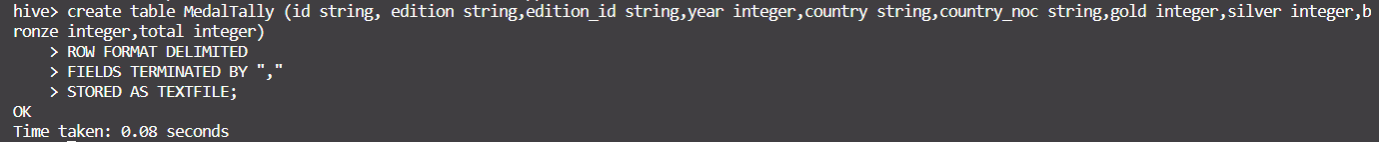

Load Data

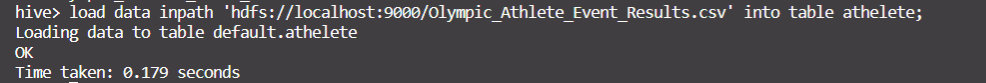

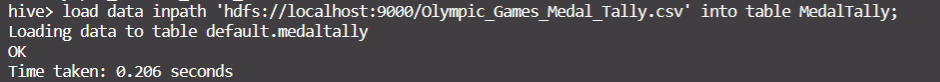

# Perform the query to find the following

* Top 5 country that has the most number of medals during year 2000-2010

* Find the athelete names of USA in year 2010 that achieves the medals.

In [ ]:

# cmd5 = "SELECT country,SUM(total) FROM medaltally WHERE year BETWEEN 2000 AND 2010 GROUP BY country ORDER BY SUM(total) DESC LIMIT 5;"

# cmd6 = "SELECT athlete FROM Athelete WHERE (country_noc="USA" AND SUBSTRING(edition,1,4)=2010 AND (medal="Gold" OR medal="Silver" OR medal="Bronze")) GROUP BY athlete;"

# ใช้คำสั่ง cmd5 และ cmd6 ใน hive โดยตรง

Top 5 country that has the most number of medals during year 2000-2010 

ใช้คำสั่ง 

SELECT country,SUM(total) FROM medaltally WHERE year BETWEEN 2000 AND 2010 GROUP BY country ORDER BY SUM(total) DESC LIMIT 5;

คือการเลือก attribute country , ผลรวมของ total จากตาราง medaltally ที่มีเงื่อนไขว่า year ต้องอยู่ระหว่างปี 2000 และ 2010 โดยหลังจากได้ผลลัพธ์ให้ทำการ Group by country และเรียงลำดับตามผลรวมของ total โดยเอาค่าที่ได้สูงสุด 5 อันดับ

image.png

Answer

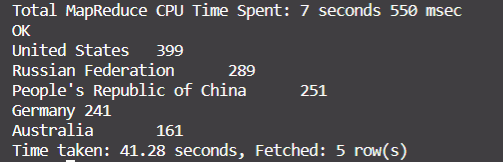

Find the athelete names of USA in year 2010 that achieves the medals.

ใช้คำสั่ง

SELECT athlete FROM Athelete WHERE (country_noc="USA" AND SUBSTRING(edition,1,4)=2010 AND (medal="Gold" OR medal="Silver" OR medal="Bronze")) GROUP BY athlete;

คือการเลือก athlete (ชื่อนักกีฬา) มาจากตาราง Athelete โดยมีเงื่อนไขว่าจะต้องมาจาก country USA และ ปีที่แข่งคือปี 2010 และได้เหรียญรางวัล ทอง หรือ เงิน หรือ ทองแดง โดยหลังจากได้ผลลัพธ์ก็จะทำการ Group by athlete (ชื่อนักกีฬา) อีกทีเพื่อให้ได้รางชื่อที่ไม่ซ้ำกันออกมา

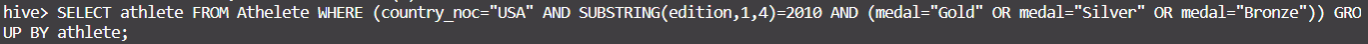

Answer

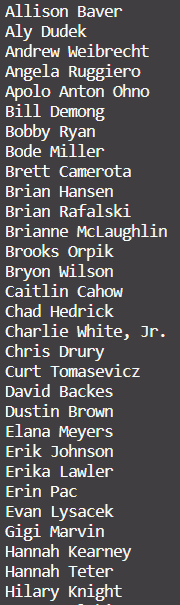

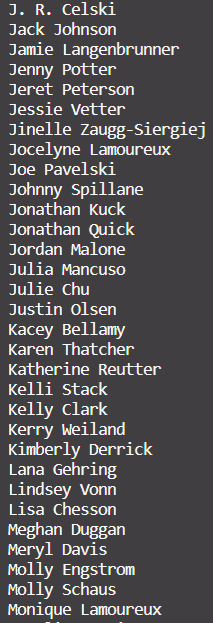

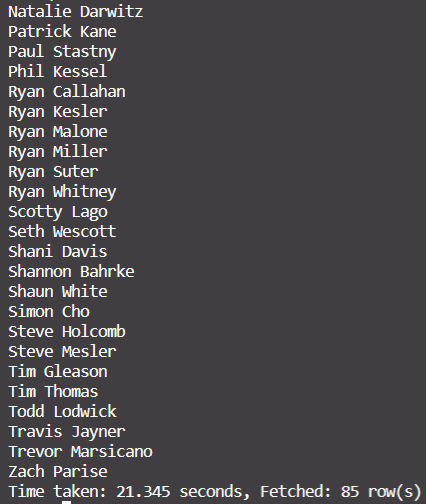